In [41]:
import pandas as pd
import seaborn as sns
from IPython.display import Image, display
import torch
import os
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image as Img
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [42]:
class ComidasDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, index_col=0)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [37]:
dataset = pd.read_csv(r"train.csv",index_col=0)

In [38]:
dataset.describe

<bound method NDFrame.describe of                                                     path_img  label
idx_train                                                          
0          all_imgs/bc7696f4-1460-4d0b-a63d-f84b3be4da0f....      0
1          all_imgs/f8d50663-60d8-4da5-a8b8-79f954aec503....      2
2          all_imgs/51df0f29-758b-4741-ab74-a0ff8e21c044....      4
3          all_imgs/f61b81d3-3b79-4162-b4d6-4f1b39518c4c....      0
4          all_imgs/b21e0668-bd09-4794-9e90-da8ecffc4c1c....      0
...                                                      ...    ...
11195      all_imgs/b834c3fa-4fb0-4e38-ae32-7fd4a4141fe6....      2
11196      all_imgs/b93165ab-a87d-4ee1-8360-9b9728a3fc4b....      6
11197      all_imgs/a130fcbb-2b90-4922-b1e2-4770fddf6b91....      5
11198      all_imgs/bf402d68-ca0b-47f2-86f9-6e81d4bdbb38....      7
11199      all_imgs/a609a4a1-bd42-4053-9de7-5e94a812425b....      0

[11200 rows x 2 columns]>

In [19]:
dataset[:1]

,path_img,label
idx_train,,
0,all_imgs/bc7696f4-1460-4d0b-a63d-f84b3be4da0f....,0


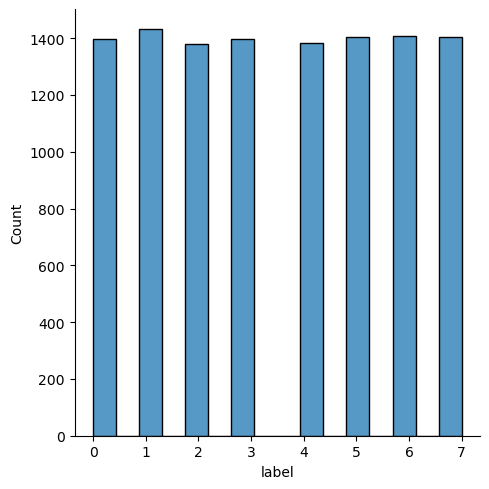

In [4]:
sns.displot(dataset.label)

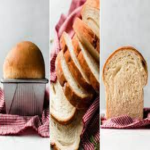

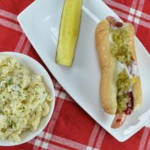

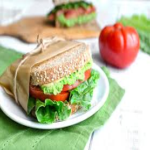

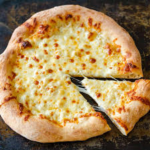

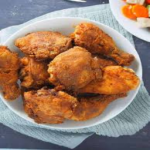

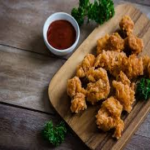

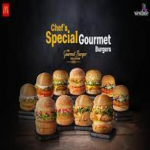

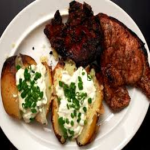

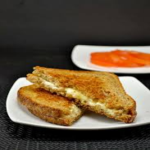

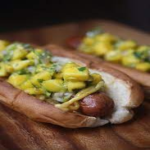

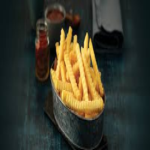

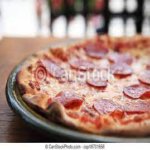

In [34]:
with os.scandir("./all_imgs") as dirs:
    l = 0
    for d in dirs:
        image = transforms.Resize(size=(150,150))(Img.open(d.path))
        display(image)
        if l > 10:
            break
        l = l + 1

In [6]:
torch.manual_seed(17)